In [108]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import scipy

## Ví dụ A.1

#### Using Numpy:

In [108]:
np.random.seed(12)
means = [[0, 3], [2, 0]]
cov1 = [[1, 0.3], [0.3, 1]]
cov2 = [[1, 0.2], [0.2, 1.5]]
N1 = 50
N2 = 40
N = N1 + N2
X1 = np.random.multivariate_normal(means[0], cov1, N1) # each row is a data point
X2 = np.random.multivariate_normal(means[1], cov2, N2)
# Combine classes and create labels
X = np.vstack((X1, X2))
y = np.hstack((np. ones(50), 2*np.ones(40)))

Number of samples in Class 1: 50
Number of samples in Class 2: 40
Mean of Class 1: [0.2041 3.0467]
Mean of Class 2: [ 1.8048 -0.1825]


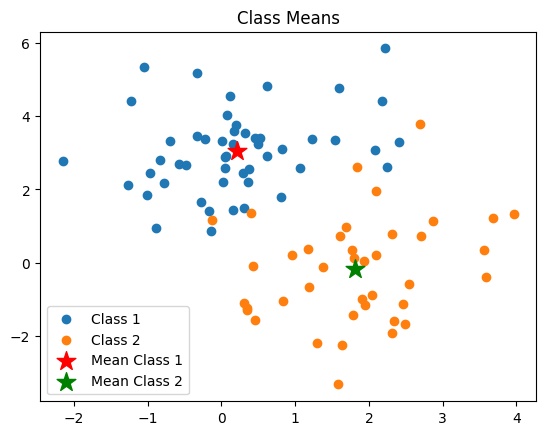

In [109]:
# Separate data by class to class1 (y=0) and class2 (y=1)
class1 = X[y == 1]
class2 = X[y == 2]
print("Number of samples in Class 1:", class1.shape[0])
print("Number of samples in Class 2:", class2.shape[0])
# Calculate class means
mean1 = np.mean(class1, axis=0)
mean2 = np.mean(class2, axis=0)
print("Mean of Class 1:", mean1)
print("Mean of Class 2:", mean2)
# Visualize class means
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(mean1[0], mean1[1], color='red', s=200, marker='*', label='Mean Class 1')
plt.scatter(mean2[0], mean2[1], color='green', s=200, marker='*', label='Mean Class 2')
plt.legend()
plt.title('Class Means')
plt.show()

In [110]:
# Build S_B
m1 = np.mean(X1.T, axis = 1, keepdims = True)
m2 = np.mean(X2.T, axis = 1, keepdims = True)
a = (m2 - m1)
S_B = a.dot(a.T)
# Build S_W
SW1 = X1.T - np.tile(m1, (1, N1))
SW2 = X2.T - np.tile(m2, (1, N2))
S_W = SW1.dot(SW1.T) + SW2.dot(SW2.T)
print('Between-class covariance matrix: S_B =\n', S_B)
print('Within-class covariance matrix: S_W =\n',S_W)

Between-class covariance matrix: S_B =
 [[ 2.5621 -5.1688]
 [-5.1688 10.4275]]
Within-class covariance matrix: S_W =
 [[ 86.8364  27.5178]
 [ 27.5178 140.24  ]]


In [102]:
# using linalg.svd instead of linalg.eig for descending order of eigenvalues
result = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigenvalues, eigenvectors = result.eigenvalues, result.eigenvectors
max_idx = np.argmax(eigenvalues)

w = eigenvectors[:, max_idx]
print(w)
print(w.shape)

[ 0.6947 -0.7193]
(2,)


(50,) (2,)
(2, 50) (2, 40)


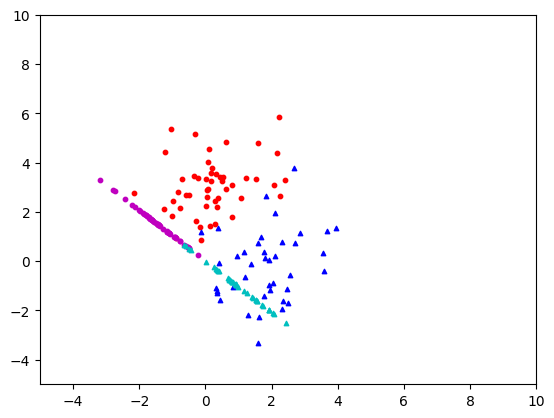

In [103]:
# Visualize data
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c='r', s=10)
plt.scatter(X2[:, 0], X2[:, 1], marker='^', c='b', s=10)
plt.axis([-5, 10, -5, 10])
#Compute projections of data points on to LDA's dimention
norm_W = w.T.dot(w)
X1_tmp = X1.dot(w)/norm_W
X2_tmp = X2.dot(w)/norm_W
print(X1_tmp.shape, w.shape)
X1_p = np.multiply(w.reshape(2,1), X1_tmp.T)
X2_p = np.multiply(w.reshape(2,1), X2_tmp.T)
print(X1_p.shape,X2_p.shape)
#Draw projected points
plt.scatter(X1_p[0, :], X1_p[1, :], marker='o', c='m', s=10)
plt.scatter(X2_p[0, :], X2_p[1, :], marker='^', c='c', s=10)
plt.show()

#### Using scikit-learn:

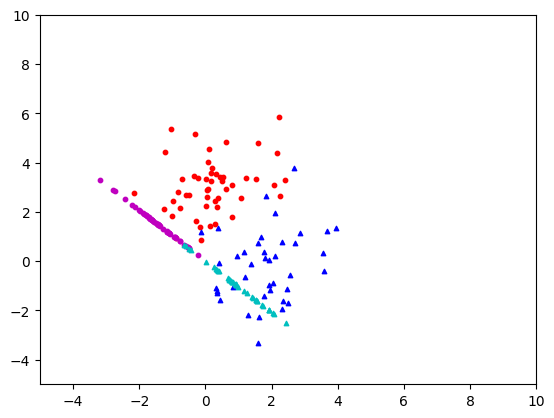

In [105]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

X1 = X[y == 1]
X2 = X[y == 2]
w = lda.coef_.squeeze().reshape((-1, 1))

#Compute projections of data points on to LDA's dimention
norm_W = np.linalg.norm(w, ord=2) ** 2
X1_tmp = X1.dot(w) / norm_W
X2_tmp = X2.dot(w) / norm_W
X1_p = X1_tmp * w.T
X2_p = X2_tmp * w.T
# Visualize data
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c='r', s=10)
plt.scatter(X2[:, 0], X2[:, 1], marker='^', c='b', s=10)
plt.axis([-5, 10, -5, 10])
#Draw projected points
plt.scatter(X1_p[:, 0], X1_p[:, 1], marker='o', c='m', s=10)
plt.scatter(X2_p[:, 0], X2_p[:, 1], marker='^',  c='c', s=10)
plt.show()

## Ví dụ A.2

In [128]:
data = pd.read_csv('pd_speech_features.csv').drop('id', axis=1)
X, y = data.drop('class', axis=1), data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=500, random_state=0, stratify=y)

#### 1.

##### PCA:

In [186]:
dim = 2
N = X_train.shape[0]

# statistics on train set
train_mean = X_train.mean()
train_std = X_train.std(ddof=0)

# normalized data
X_train_normalized = (X_train - train_mean) / train_std
X_test_normalized = (X_test - train_mean) / train_std
X_corr = 1 / N * X_train_normalized.T.dot(X_train_normalized)

# pca
u, s, v = np.linalg.svd(X_corr)
train_pca = u[:, :dim].T.dot(X_train_normalized.T)
test_pca = u[:, :dim].T.dot(X_test_normalized.T)

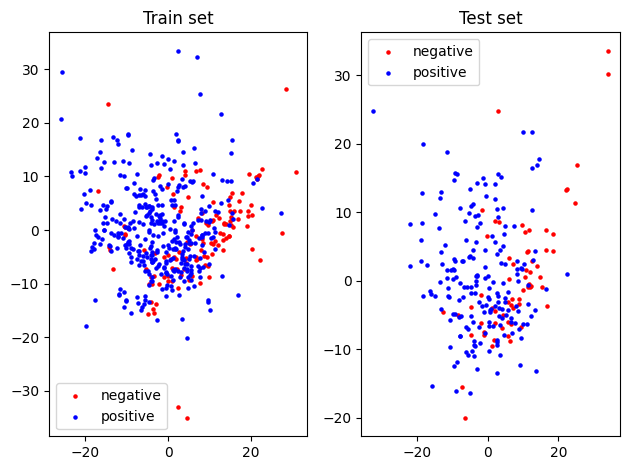

In [64]:
# visualize
pca0_train = train_pca[:, y_train == 0]
pca1_train = train_pca[:, y_train == 1]
pca0_test = test_pca[:, y_test == 0]
pca1_test = test_pca[:, y_test == 1]

plt.subplot(1,2,1)
plt.scatter(pca0_train[0,:], pca0_train[1,:], c='r', s=5, label='negative')
plt.scatter(pca1_train[0,:], pca1_train[1,:], c='b', s=5, label='positive')
plt.legend()
plt.title('Train set')

plt.subplot(1,2,2)
plt.scatter(pca0_test[0,:], pca0_test[1,:], c='r', s=5, label='negative')
plt.scatter(pca1_test[0,:], pca1_test[1,:], c='b', s=5, label='positive')
plt.legend()
plt.title('Test set')

plt.tight_layout()

In [ ]:
# fitting model
lr_lda = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_lda.fit(train_pca.T, y_train)

gnb_pca = GaussianNB(priors=None)
gnb_pca.fit(train_pca.T, y_train)

GaussianNB()

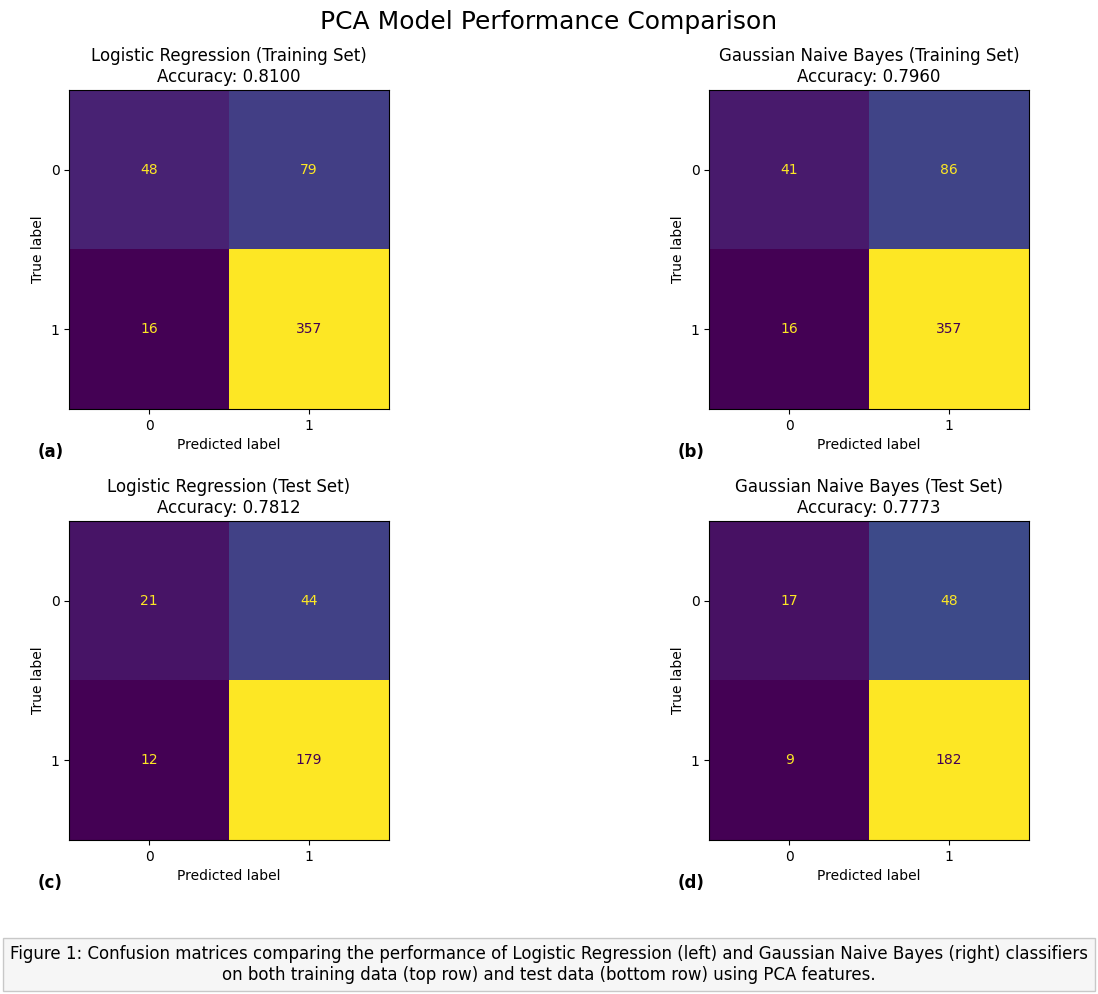

In [ ]:
# predict
# Training set
lr_train_pred = lr_lda.predict(train_pca.T)
gnb_train_pred = gnb_pca.predict(train_pca.T)

# Test set
lr_test_pred = lr_lda.predict(test_pca.T)  
gnb_test_pred = gnb_pca.predict(test_pca.T)

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Main title for the entire figure
fig.suptitle('PCA Model Performance Comparison', fontsize=18, y=0.98)

# First row: Training set results
# Logistic Regression (top-left)
ConfusionMatrixDisplay.from_predictions(y_train, lr_train_pred, ax=axes[0, 0], colorbar=False)
axes[0, 0].set_title(f'Logistic Regression (Training Set)\nAccuracy: {accuracy_score(y_train, lr_train_pred):.4f}')
axes[0, 0].text(-0.1, -0.15, "(a)", transform=axes[0, 0].transAxes, fontsize=12, fontweight='bold')

# Gaussian NB (top-right)
ConfusionMatrixDisplay.from_predictions(y_train, gnb_train_pred, ax=axes[0, 1], colorbar=False)
axes[0, 1].set_title(f'Gaussian Naive Bayes (Training Set)\nAccuracy: {accuracy_score(y_train, gnb_train_pred):.4f}')
axes[0, 1].text(-0.1, -0.15, "(b)", transform=axes[0, 1].transAxes, fontsize=12, fontweight='bold')

# Second row: Test set results
# Logistic Regression (bottom-left)
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_pred, ax=axes[1, 0], colorbar=False)
axes[1, 0].set_title(f'Logistic Regression (Test Set)\nAccuracy: {accuracy_score(y_test, lr_test_pred):.4f}')
axes[1, 0].text(-0.1, -0.15, "(c)", transform=axes[1, 0].transAxes, fontsize=12, fontweight='bold')

# Gaussian NB (bottom-right)
ConfusionMatrixDisplay.from_predictions(y_test, gnb_test_pred, ax=axes[1, 1], colorbar=False)
axes[1, 1].set_title(f'Gaussian Naive Bayes (Test Set)\nAccuracy: {accuracy_score(y_test, gnb_test_pred):.4f}')
axes[1, 1].text(-0.1, -0.15, "(d)", transform=axes[1, 1].transAxes, fontsize=12, fontweight='bold')

# Add explanatory caption
plt.figtext(0.5, 0.01, 
            "Figure 1: Confusion matrices comparing the performance of Logistic Regression (left) and Gaussian Naive Bayes (right) classifiers\n"
            "on both training data (top row) and test data (bottom row) using PCA features.",
            ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.15, hspace=0.35)
plt.show()

##### LDA:

In [132]:
# calculate mean
X0 = X_train[y_train == 0]
X1 = X_train[y_train == 1]

m0 = X0.mean()
m1 = X1.mean()

# create S_B
a = m0.to_numpy().reshape((-1, 1)) - m1.to_numpy().reshape((-1, 1))
S_B = a.dot(a.T)

# create S_W
SW0 = (X0 - m0).T.dot(X0 - m0).to_numpy()
SW1 = (X1 - m1).T.dot(X1 - m1).to_numpy()
eps = 1e-3
diag = np.diag(np.repeat(eps, X0.shape[1]))  # lambda*I_n
S_W = SW0 + SW1 + diag  # add lambda*I_n because S_W is singular matrix

# transform
dim = 1
U, S, V = scipy.linalg.svd(scipy.linalg.inv(S_W) @ S_B)
train_lda = U[:, :dim].T.dot(X_train.T)
test_lda = U[:, :dim].T.dot(X_test.T)

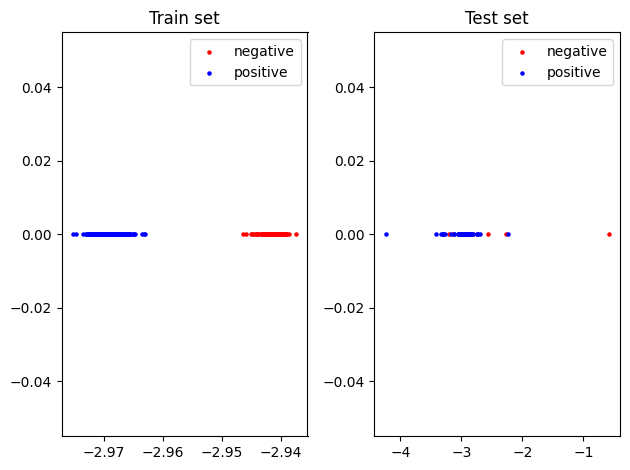

In [133]:
# visualize
lda0_train = train_lda[0, y_train == 0]
lda1_train = train_lda[0, y_train == 1]
lda0_test = test_lda[0, y_test == 0]
lda1_test = test_lda[0, y_test == 1]

plt.subplot(1,2,1)
plt.scatter(lda0_train, np.repeat(0, len(lda0_train)), c='r', s=5, label='negative')
plt.scatter(lda1_train, np.repeat(0, len(lda1_train)), c='b', s=5, label='positive')
plt.legend()
plt.title('Train set')

plt.subplot(1,2,2)
plt.scatter(lda0_test, np.repeat(0, len(lda0_test)), c='r', s=5, label='negative')
plt.scatter(lda1_test, np.repeat(0, len(lda1_test)), c='b', s=5, label='positive')
plt.legend()
plt.title('Test set')

plt.tight_layout()

- Việc sử dụng LDA trên tập train cho kết quả rất tốt, tuy nhiên kết quả thu được trên tập test lại rất kém.

In [135]:
# fitting model
lr_lda = LogisticRegression(fit_intercept=True, max_iter=10000, penalty=None)
lr_lda.fit(train_lda.T, y_train)

gnb_lda = GaussianNB(priors=None)
gnb_lda.fit(train_lda.T, y_train)

GaussianNB()

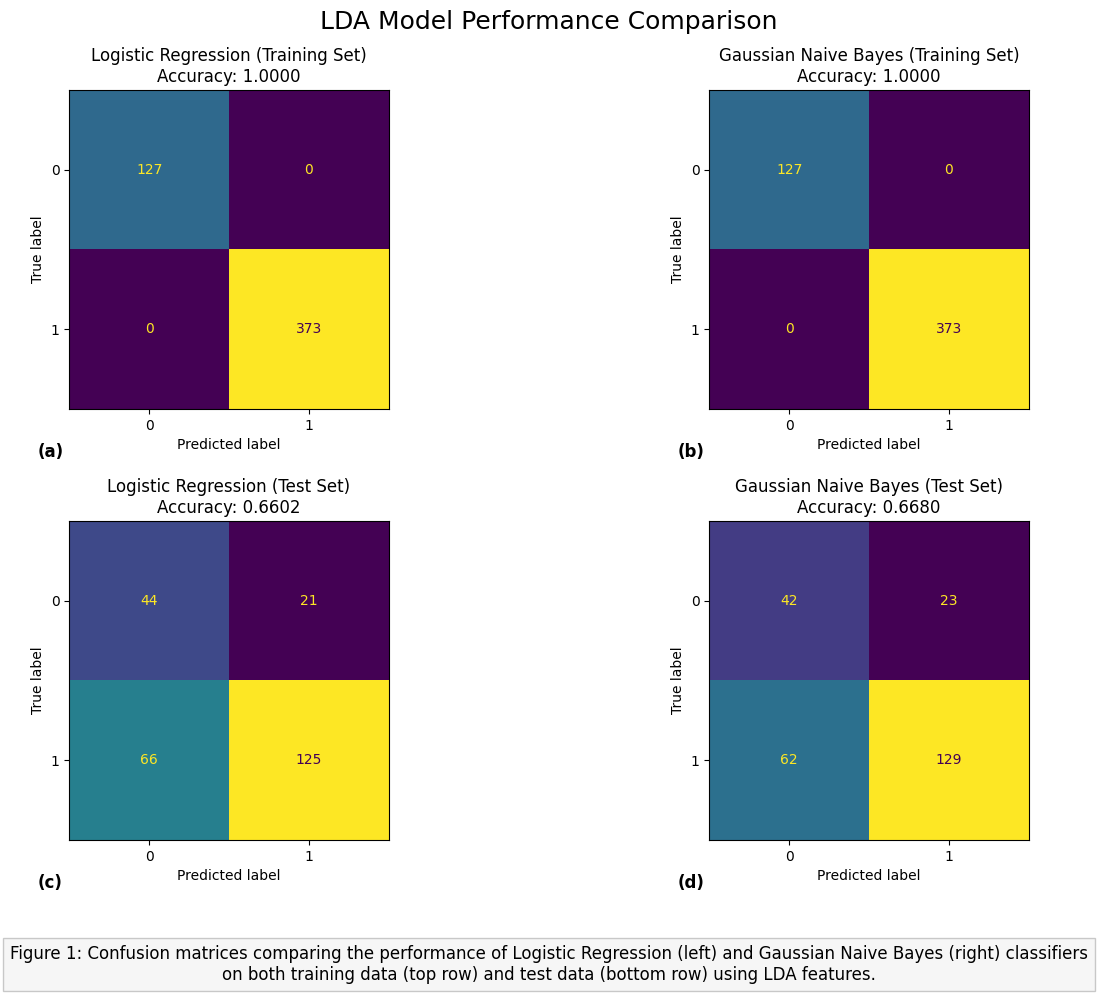

In [136]:
# predict
# Training set
lr_train_pred = lr_lda.predict(train_lda.T)
gnb_train_pred = gnb_lda.predict(train_lda.T)

# Test set
lr_test_pred = lr_lda.predict(test_lda.T)  
gnb_test_pred = gnb_lda.predict(test_lda.T)

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Main title for the entire figure
fig.suptitle('LDA Model Performance Comparison', fontsize=18, y=0.98)

# First row: Training set results
# Logistic Regression (top-left)
ConfusionMatrixDisplay.from_predictions(y_train, lr_train_pred, ax=axes[0, 0], colorbar=False)
axes[0, 0].set_title(f'Logistic Regression (Training Set)\nAccuracy: {accuracy_score(y_train, lr_train_pred):.4f}')
axes[0, 0].text(-0.1, -0.15, "(a)", transform=axes[0, 0].transAxes, fontsize=12, fontweight='bold')

# Gaussian NB (top-right)
ConfusionMatrixDisplay.from_predictions(y_train, gnb_train_pred, ax=axes[0, 1], colorbar=False)
axes[0, 1].set_title(f'Gaussian Naive Bayes (Training Set)\nAccuracy: {accuracy_score(y_train, gnb_train_pred):.4f}')
axes[0, 1].text(-0.1, -0.15, "(b)", transform=axes[0, 1].transAxes, fontsize=12, fontweight='bold')

# Second row: Test set results
# Logistic Regression (bottom-left)
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_pred, ax=axes[1, 0], colorbar=False)
axes[1, 0].set_title(f'Logistic Regression (Test Set)\nAccuracy: {accuracy_score(y_test, lr_test_pred):.4f}')
axes[1, 0].text(-0.1, -0.15, "(c)", transform=axes[1, 0].transAxes, fontsize=12, fontweight='bold')

# Gaussian NB (bottom-right)
ConfusionMatrixDisplay.from_predictions(y_test, gnb_test_pred, ax=axes[1, 1], colorbar=False)
axes[1, 1].set_title(f'Gaussian Naive Bayes (Test Set)\nAccuracy: {accuracy_score(y_test, gnb_test_pred):.4f}')
axes[1, 1].text(-0.1, -0.15, "(d)", transform=axes[1, 1].transAxes, fontsize=12, fontweight='bold')

# Add explanatory caption
plt.figtext(0.5, 0.01, 
            "Figure 1: Confusion matrices comparing the performance of Logistic Regression (left) and Gaussian Naive Bayes (right) classifiers\n"
            "on both training data (top row) and test data (bottom row) using LDA features.",
            ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.15, hspace=0.35)
plt.show()

#### 2.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify=y)

Without dimensional reduction:

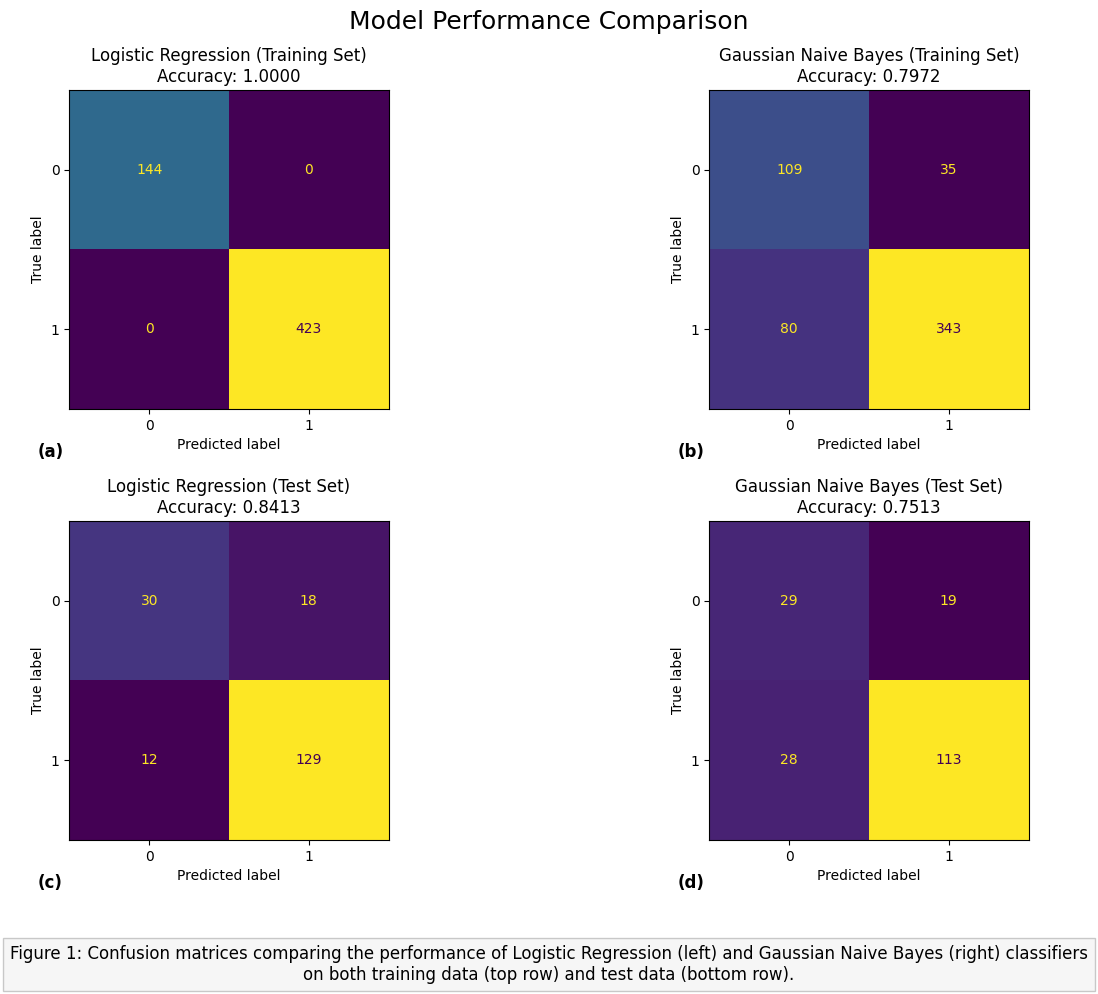

In [87]:
train_mean = X_train.mean()
train_std = X_train.std(ddof=0)

X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled = (X_test - train_mean) / train_std

lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(X_train_scaled, y_train)

gnb = GaussianNB(priors=None)
gnb.fit(X_train_scaled, y_train)

# predict
# Training set
lr_train_pred = lr.predict(X_train_scaled)
gnb_train_pred = gnb.predict(X_train_scaled)

# Test set
lr_test_pred = lr.predict(X_test_scaled)  
gnb_test_pred = gnb.predict(X_test_scaled)

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Main title for the entire figure
fig.suptitle('Model Performance Comparison', fontsize=18, y=0.98)

# First row: Training set results
# Logistic Regression (top-left)
ConfusionMatrixDisplay.from_predictions(y_train, lr_train_pred, ax=axes[0, 0], colorbar=False)
axes[0, 0].set_title(f'Logistic Regression (Training Set)\nAccuracy: {accuracy_score(y_train, lr_train_pred):.4f}')
axes[0, 0].text(-0.1, -0.15, "(a)", transform=axes[0, 0].transAxes, fontsize=12, fontweight='bold')

# Gaussian NB (top-right)
ConfusionMatrixDisplay.from_predictions(y_train, gnb_train_pred, ax=axes[0, 1], colorbar=False)
axes[0, 1].set_title(f'Gaussian Naive Bayes (Training Set)\nAccuracy: {accuracy_score(y_train, gnb_train_pred):.4f}')
axes[0, 1].text(-0.1, -0.15, "(b)", transform=axes[0, 1].transAxes, fontsize=12, fontweight='bold')

# Second row: Test set results
# Logistic Regression (bottom-left)
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_pred, ax=axes[1, 0], colorbar=False)
axes[1, 0].set_title(f'Logistic Regression (Test Set)\nAccuracy: {accuracy_score(y_test, lr_test_pred):.4f}')
axes[1, 0].text(-0.1, -0.15, "(c)", transform=axes[1, 0].transAxes, fontsize=12, fontweight='bold')

# Gaussian NB (bottom-right)
ConfusionMatrixDisplay.from_predictions(y_test, gnb_test_pred, ax=axes[1, 1], colorbar=False)
axes[1, 1].set_title(f'Gaussian Naive Bayes (Test Set)\nAccuracy: {accuracy_score(y_test, gnb_test_pred):.4f}')
axes[1, 1].text(-0.1, -0.15, "(d)", transform=axes[1, 1].transAxes, fontsize=12, fontweight='bold')

# Add explanatory caption
plt.figtext(0.5, 0.01, 
            "Figure 1: Confusion matrices comparing the performance of Logistic Regression (left) and Gaussian Naive Bayes (right) classifiers\n"
            "on both training data (top row) and test data (bottom row).",
            ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.15, hspace=0.35)
plt.show()

With dimensional reduction:

- PCA:

In [4]:
dim = 2
N = X_train.shape[0]

# statistics on train set
train_mean = X_train.mean()
train_std = X_train.std(ddof=0)

# normalized data
X_train_normalized = (X_train - train_mean) / train_std
X_test_normalized = (X_test - train_mean) / train_std
X_corr = 1 / N * X_train_normalized.T.dot(X_train_normalized)

# pca
u, s, v = np.linalg.svd(X_corr)
train_pca = u[:, :dim].T.dot(X_train_normalized.T)
test_pca = u[:, :dim].T.dot(X_test_normalized.T)

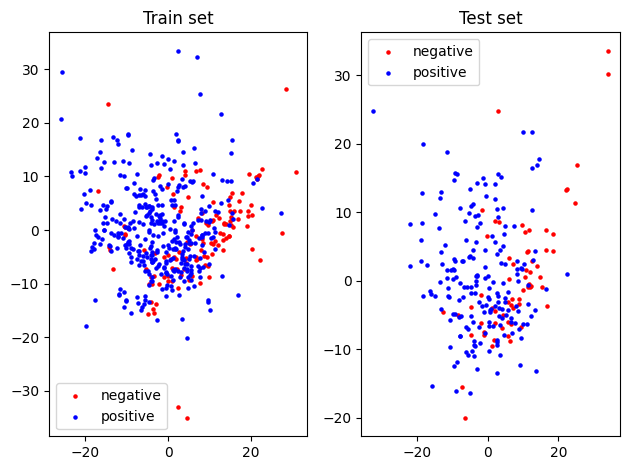

In [5]:
# visualize
pca0_train = train_pca[:, y_train == 0]
pca1_train = train_pca[:, y_train == 1]
pca0_test = test_pca[:, y_test == 0]
pca1_test = test_pca[:, y_test == 1]

plt.subplot(1,2,1)
plt.scatter(pca0_train[0,:], pca0_train[1,:], c='r', s=5, label='negative')
plt.scatter(pca1_train[0,:], pca1_train[1,:], c='b', s=5, label='positive')
plt.legend()
plt.title('Train set')

plt.subplot(1,2,2)
plt.scatter(pca0_test[0,:], pca0_test[1,:], c='r', s=5, label='negative')
plt.scatter(pca1_test[0,:], pca1_test[1,:], c='b', s=5, label='positive')
plt.legend()
plt.title('Test set')

plt.tight_layout()

In [ ]:
# fitting model
lr_lda = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_lda.fit(train_pca.T, y_train)

gnb_pca = GaussianNB(priors=None)
gnb_pca.fit(train_pca.T, y_train)

GaussianNB()

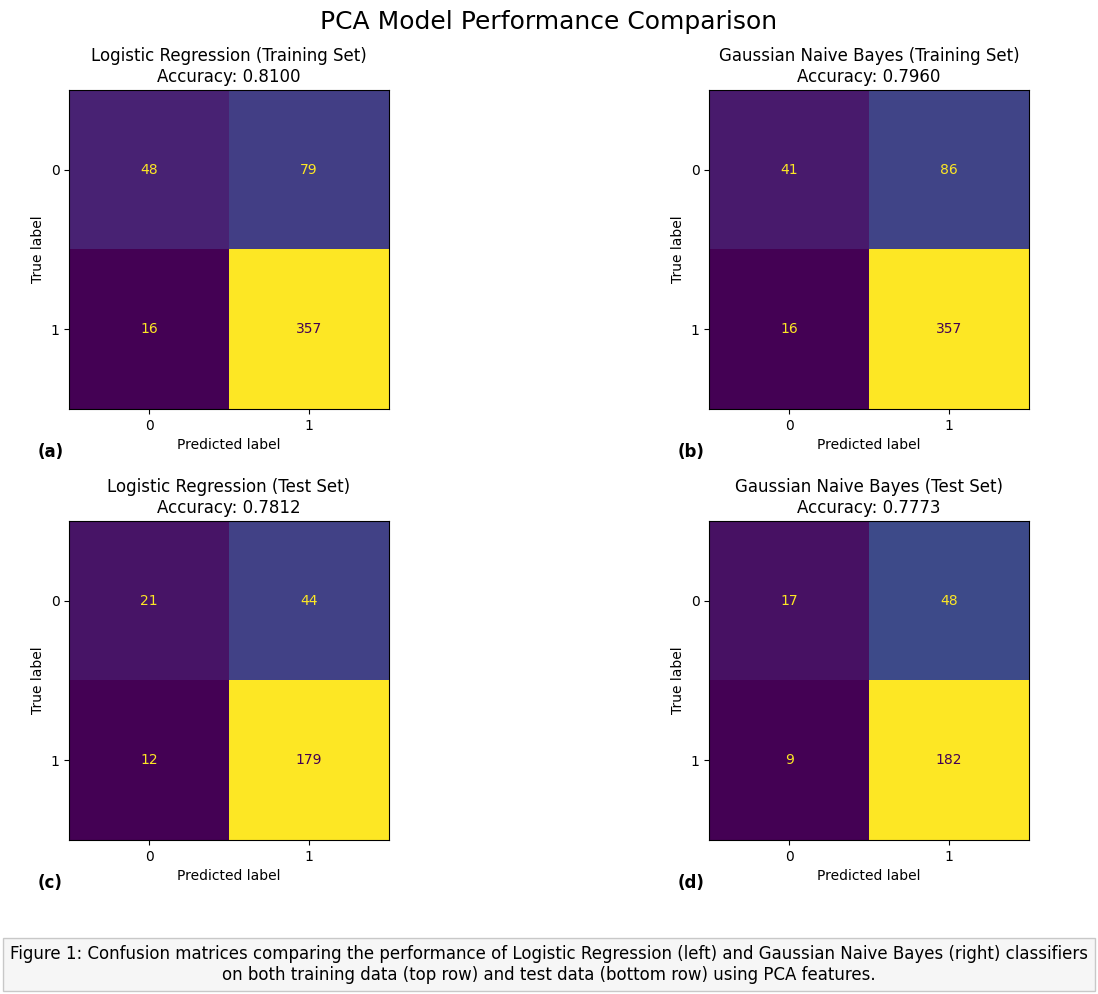

In [ ]:
# predict
# Training set
lr_train_pred = lr_lda.predict(train_pca.T)
gnb_train_pred = gnb_pca.predict(train_pca.T)

# Test set
lr_test_pred = lr_lda.predict(test_pca.T)  
gnb_test_pred = gnb_pca.predict(test_pca.T)

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Main title for the entire figure
fig.suptitle('PCA Model Performance Comparison', fontsize=18, y=0.98)

# First row: Training set results
# Logistic Regression (top-left)
ConfusionMatrixDisplay.from_predictions(y_train, lr_train_pred, ax=axes[0, 0], colorbar=False)
axes[0, 0].set_title(f'Logistic Regression (Training Set)\nAccuracy: {accuracy_score(y_train, lr_train_pred):.4f}')
axes[0, 0].text(-0.1, -0.15, "(a)", transform=axes[0, 0].transAxes, fontsize=12, fontweight='bold')

# Gaussian NB (top-right)
ConfusionMatrixDisplay.from_predictions(y_train, gnb_train_pred, ax=axes[0, 1], colorbar=False)
axes[0, 1].set_title(f'Gaussian Naive Bayes (Training Set)\nAccuracy: {accuracy_score(y_train, gnb_train_pred):.4f}')
axes[0, 1].text(-0.1, -0.15, "(b)", transform=axes[0, 1].transAxes, fontsize=12, fontweight='bold')

# Second row: Test set results
# Logistic Regression (bottom-left)
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_pred, ax=axes[1, 0], colorbar=False)
axes[1, 0].set_title(f'Logistic Regression (Test Set)\nAccuracy: {accuracy_score(y_test, lr_test_pred):.4f}')
axes[1, 0].text(-0.1, -0.15, "(c)", transform=axes[1, 0].transAxes, fontsize=12, fontweight='bold')

# Gaussian NB (bottom-right)
ConfusionMatrixDisplay.from_predictions(y_test, gnb_test_pred, ax=axes[1, 1], colorbar=False)
axes[1, 1].set_title(f'Gaussian Naive Bayes (Test Set)\nAccuracy: {accuracy_score(y_test, gnb_test_pred):.4f}')
axes[1, 1].text(-0.1, -0.15, "(d)", transform=axes[1, 1].transAxes, fontsize=12, fontweight='bold')

# Add explanatory caption
plt.figtext(0.5, 0.01, 
            "Figure 1: Confusion matrices comparing the performance of Logistic Regression (left) and Gaussian Naive Bayes (right) classifiers\n"
            "on both training data (top row) and test data (bottom row) using PCA features.",
            ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.15, hspace=0.35)
plt.show()

- LDA:

In [ ]:
# calculate mean
X0 = X_train[y_train == 0]
X1 = X_train[y_train == 1]

m0 = X0.mean()
m1 = X1.mean()

# create S_B
a = m0.to_numpy().reshape((-1, 1)) - m1.to_numpy().reshape((-1, 1))
S_B = a.dot(a.T)

# create S_W
SW0 = (X0 - m0).T.dot(X0 - m0)
SW1 = (X1 - m1).T.dot(X1 - m1)
eps = 1e-3
diag = np.diag(np.repeat(eps, X0.shape[1]))  # lambda*I_n
S_W = SW0 + SW1 + diag  # add lambda*I_n because S_W is singular matrix

# transform
dim = 1
U, S, _ = np.linalg.svd(np.linalg.inv(S_W).dot(S_B))
train_lda = U[:, :dim].T.dot(X_train.T)
lda_test = U[:, :dim].T.dot(X_test.T)

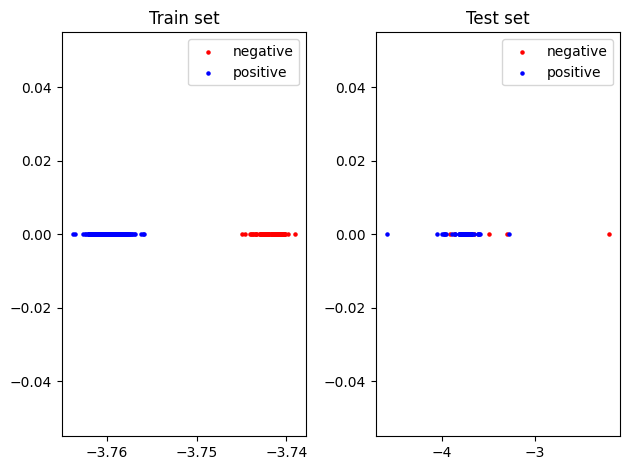

In [ ]:
# visualize
lda0_train = train_lda[0, y_train == 0]
lda1_train = train_lda[0, y_train == 1]
lda0_test = lda_test[0, y_test == 0]
lda1_test = lda_test[0, y_test == 1]

plt.subplot(1,2,1)
plt.scatter(lda0_train, np.repeat(0, len(lda0_train)), c='r', s=5, label='negative')
plt.scatter(lda1_train, np.repeat(0, len(lda1_train)), c='b', s=5, label='positive')
plt.legend()
plt.title('Train set')

plt.subplot(1,2,2)
plt.scatter(lda0_test, np.repeat(0, len(lda0_test)), c='r', s=5, label='negative')
plt.scatter(lda1_test, np.repeat(0, len(lda1_test)), c='b', s=5, label='positive')
plt.legend()
plt.title('Test set')

plt.tight_layout()

In [ ]:
# fitting model
lr_lda = LogisticRegression(fit_intercept=True, max_iter=10000, penalty=None)
lr_lda.fit(train_lda.T, y_train)

gnb_lda = GaussianNB(priors=None)
gnb_lda.fit(train_lda.T, y_train)

GaussianNB()

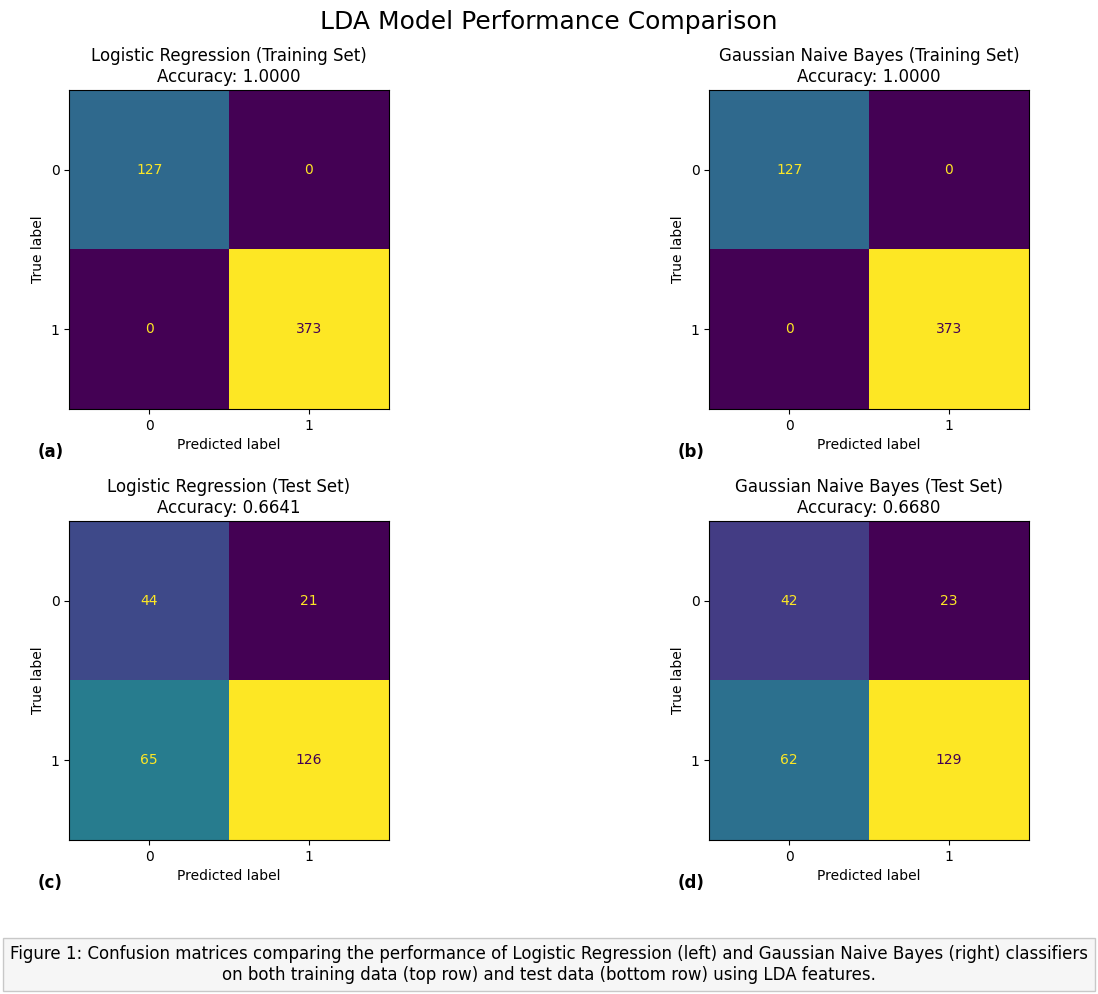

In [ ]:
# predict
# Training set
lr_train_pred = lr_lda.predict(train_lda.T)
gnb_train_pred = gnb_lda.predict(train_lda.T)

# Test set
lr_test_pred = lr_lda.predict(lda_test.T)  
gnb_test_pred = gnb_lda.predict(lda_test.T)

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Main title for the entire figure
fig.suptitle('LDA Model Performance Comparison', fontsize=18, y=0.98)

# First row: Training set results
# Logistic Regression (top-left)
ConfusionMatrixDisplay.from_predictions(y_train, lr_train_pred, ax=axes[0, 0], colorbar=False)
axes[0, 0].set_title(f'Logistic Regression (Training Set)\nAccuracy: {accuracy_score(y_train, lr_train_pred):.4f}')
axes[0, 0].text(-0.1, -0.15, "(a)", transform=axes[0, 0].transAxes, fontsize=12, fontweight='bold')

# Gaussian NB (top-right)
ConfusionMatrixDisplay.from_predictions(y_train, gnb_train_pred, ax=axes[0, 1], colorbar=False)
axes[0, 1].set_title(f'Gaussian Naive Bayes (Training Set)\nAccuracy: {accuracy_score(y_train, gnb_train_pred):.4f}')
axes[0, 1].text(-0.1, -0.15, "(b)", transform=axes[0, 1].transAxes, fontsize=12, fontweight='bold')

# Second row: Test set results
# Logistic Regression (bottom-left)
ConfusionMatrixDisplay.from_predictions(y_test, lr_test_pred, ax=axes[1, 0], colorbar=False)
axes[1, 0].set_title(f'Logistic Regression (Test Set)\nAccuracy: {accuracy_score(y_test, lr_test_pred):.4f}')
axes[1, 0].text(-0.1, -0.15, "(c)", transform=axes[1, 0].transAxes, fontsize=12, fontweight='bold')

# Gaussian NB (bottom-right)
ConfusionMatrixDisplay.from_predictions(y_test, gnb_test_pred, ax=axes[1, 1], colorbar=False)
axes[1, 1].set_title(f'Gaussian Naive Bayes (Test Set)\nAccuracy: {accuracy_score(y_test, gnb_test_pred):.4f}')
axes[1, 1].text(-0.1, -0.15, "(d)", transform=axes[1, 1].transAxes, fontsize=12, fontweight='bold')

# Add explanatory caption
plt.figtext(0.5, 0.01, 
            "Figure 1: Confusion matrices comparing the performance of Logistic Regression (left) and Gaussian Naive Bayes (right) classifiers\n"
            "on both training data (top row) and test data (bottom row) using LDA features.",
            ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.15, hspace=0.35)
plt.show()

NHẬN XÉT:
- a. Mô hình logistic regression có độ chính xác thay đổi nhiều hơn, bởi việc mô hình này hoạt động có tốt không còn phụ thuộc nhiều vào tính tách được của dữ liệu, và ta có thể thấy được khi sử dụng mỗi phương pháp khác nhau, tính tách được của dữ liệu lại thay đổi nhiều, dẫn đến nhận xét vừa nêu.
- b. Dữ liệu sử dụng phương pháp LDA cho sự thay đổi nhiều hơn bởi trong trường hợp ta thực hiện, nó làm tăng tính tách được tuyến tính của dữ liệu (tách được tuyến tính trên tập train, và gần tách được tuyến tính trên tập test).

## Ví dụ B.1

#### 1.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
label_dict = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

In [85]:
np.set_printoptions(precision = 4)
mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(X_iris[y_iris==cl], axis=0))
    print('Mean vector of class', cl+1, mean_vectors[cl],'.T')

Mean vector of class 1 [5.006 3.428 1.462 0.246] .T
Mean vector of class 2 [5.936 2.77  4.26  1.326] .T
Mean vector of class 3 [6.588 2.974 5.552 2.026] .T


In [151]:
S_W = np.zeros((4,4))
for cl, mv in zip(range(0, 3), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in X_iris[y_iris == cl]:
        row = row.reshape(4, 1)
        mv = mv.reshape(4, 1)
        class_sc_mat += (row - mv).dot((row -mv).T)
    S_W += class_sc_mat
print(S_W)

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [152]:
#the calculate the overall mean with a simple function
overall_mean = np.mean(X_iris, axis = 0)
#initialize zeros mnatrix
S_B = np.zeros((4,4))
#For every iteration in the mean vectors
for cl,mean_vec in enumerate(mean_vectors):
    #Extracting the number of samples per class, in this case, 50
    n = X_iris[y_iris == cl,:].shape[0]
    #Reshaping matrices from 1x4 to 4x1 for better manipulation
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    #Applying the equation
    S_B += n * (mean_vec - overall_mean) .dot((mean_vec - overall_mean).T)
print(S_B)

[[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


In [155]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
    print("\nEigenvector {}: \n{}".format(i+1, eigenvectors_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eigenvalues[i].real))


Eigenvector 1: 
[[ 0.2087]
 [ 0.3862]
 [-0.554 ]
 [-0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.8851]
 [-0.2946]
 [-0.2726]
 [-0.2356]]
Eigenvalue 3: 3.53e-15

Eigenvector 4: 
[[-0.8059]
 [ 0.4043]
 [ 0.4127]
 [-0.129 ]]
Eigenvalue 4: 3.17e-17


In [9]:
#List of every eigenvector and its corresponding eigenvalue
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
#Sorting in descending order
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)
print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print (i[0])
print("Variance Explained: \n")
eigenvalues_sum = sum(eigenvalues)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1, (j[0]/eigenvalues_sum).real))

Eigenvalues in decreasing order: 

32.19192919827803
0.28539104262306414
3.5296362660244315e-15
3.17116800810927e-17
Variance Explained: 

Eigenvalue 1:  99.12%
Eigenvalue 2:  0.88%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%


In [10]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[ 0.2087 -0.0065]
 [ 0.3862 -0.5866]
 [-0.554   0.2526]
 [-0.7074 -0.7695]]


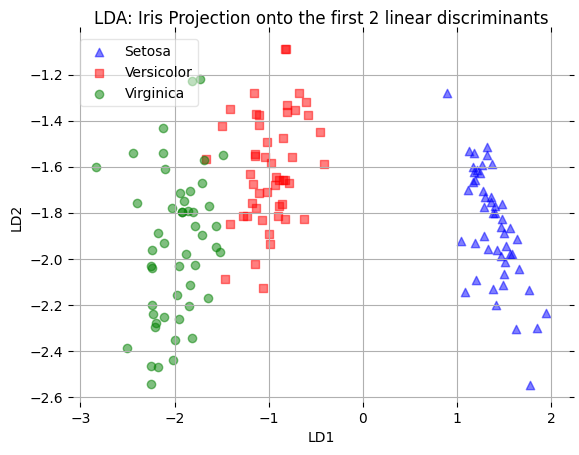

In [11]:
X_lda= X_iris.dot (W)
#will throw an error in case the dot product has made an error assert
X_lda.shape == (150,2), "The matrix is not 150x2 dimensional"
def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(range(0,3), ("^", "s", "o"), ("blue", "red", "green")):
        plt.scatter (x = X_lda[:,0].real [y_iris == label],
        y= X_lda[:,1].real [y_iris ==label],
        marker = marker,
        color =color,
        alpha = 0.5,
        label = label_dict[label])
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend (loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha (0.5)
    plt.title("LDA: Iris Projection onto the first 2 linear discriminants")
    plt.tick_params (axis="both", which = "both", bottom = "off", top = "off",
    labelbottom = "on", left = "off", right= "off", labelleft = "on")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible (False)
    ax.spines["bottom"].set_visible (False)
    ax.spines["left"].set_visible (False)
    plt.grid()
    plt.tight_layout
    plt.show()
plot_step_lda()

#### 2.

In [138]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
label_dict = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size=0.8, random_state=42, stratify=y_iris)

##### a. Without dimensional reduction

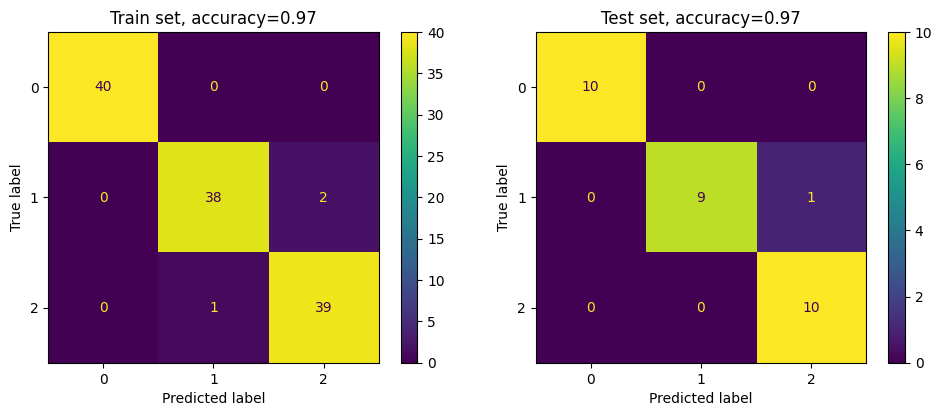

In [17]:
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(X_train, y_train)

# predict
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Tạo 2 subplot

ConfusionMatrixDisplay.from_predictions(y_train, lr_pred_train, ax=axes[0])
axes[0].set_title(f'Train set, accuracy={accuracy_score(y_train, lr_pred_train):.2f}')

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred_test, ax=axes[1])
axes[1].set_title(f'Test set, accuracy={accuracy_score(y_test, lr_pred_test):.2f}')

plt.tight_layout()
plt.show()

##### b. With dimensional reduction

In [145]:
# (i) pca
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0, ddof=0)

## normalized X
X_train_normalized = (X_train - train_mean) / train_std
X_test_normalized = (X_test - train_mean) / train_std

N = X_train.shape[0]
X_corr = 1 / N * X_train_normalized.T.dot(X_train_normalized)

dim = 2
u, s, v = np.linalg.svd(X_corr)
print(f'Explained variance ratio of first {dim} components: {np.sum(s[:dim])/np.sum(s)*100:.2f}%')

## transform
lda_train = u[:, :dim].T.dot(X_train_normalized.T)
lda_test = u[:, :dim].T.dot(X_test_normalized.T)

Explained variance ratio of first 2 components: 95.74%


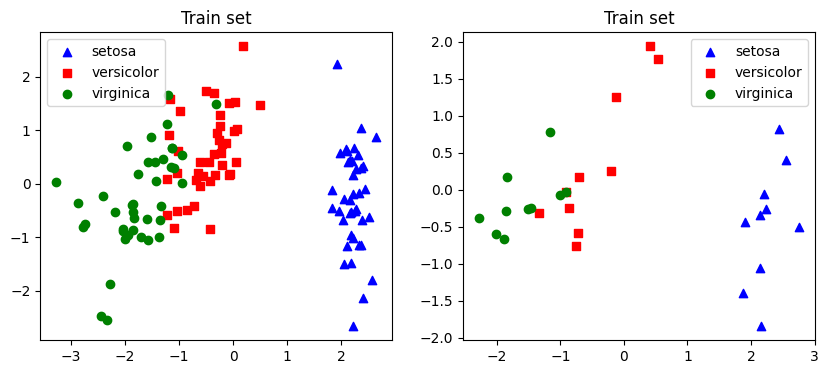

In [146]:
# visualize results
lda_train_0 = lda_train[:, y_train == 0]
lda_train_1 = lda_train[:, y_train == 1]
lda_train_2 = lda_train[:, y_train == 2]

lda_test_0 = lda_test[:, y_test == 0]
lda_test_1 = lda_test[:, y_test == 1]
lda_test_2 = lda_test[:, y_test == 2]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Tạo 2 subplot

axes[0].scatter(lda_train_0[0, :], lda_train_0[1, :], marker='^', c='b', label='setosa')
axes[0].scatter(lda_train_1[0, :], lda_train_1[1, :], marker='s', c='r', label='versicolor')
axes[0].scatter(lda_train_2[0, :], lda_train_2[1, :], marker='o', c='g', label='virginica')
axes[0].set_title('Train set')
axes[0].legend()

axes[1].scatter(lda_test_0[0, :], lda_test_0[1, :], marker='^', c='b', label='setosa')
axes[1].scatter(lda_test_1[0, :], lda_test_1[1, :], marker='s', c='r', label='versicolor')
axes[1].scatter(lda_test_2[0, :], lda_test_2[1, :], marker='o', c='g', label='virginica')
axes[1].set_title('Train set')
axes[1].legend()

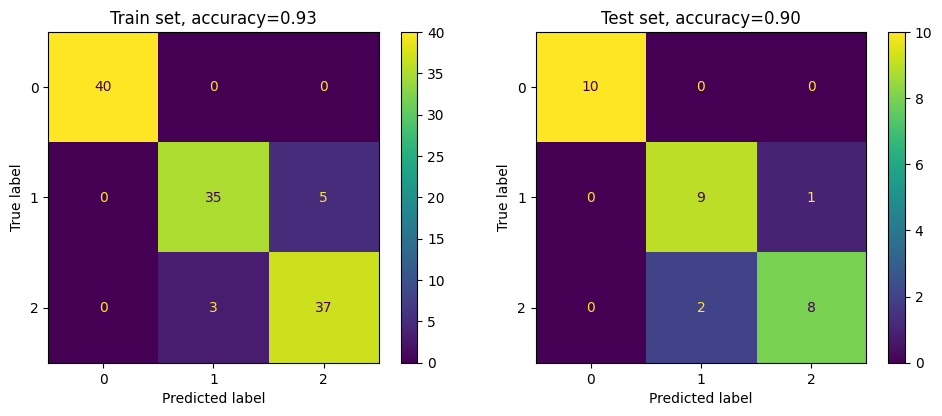

In [ ]:
lr_lda = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_lda.fit(lda_train.T, y_train)

# predict
lda_train_pred = lr_lda.predict(lda_train.T)
lda_test_pred = lr_lda.predict(lda_test.T)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Tạo 2 subplot

ConfusionMatrixDisplay.from_predictions(y_train, lda_train_pred, ax=axes[0])
axes[0].set_title(f'Train set, accuracy={accuracy_score(y_train, lda_train_pred):.2f}')

ConfusionMatrixDisplay.from_predictions(y_test, lda_test_pred, ax=axes[1])
axes[1].set_title(f'Test set, accuracy={accuracy_score(y_test, lda_test_pred):.2f}')

plt.tight_layout()
plt.show()

In [148]:
# (ii) lda
X0_train = X_train[y_train == 0, :]
X1_train = X_train[y_train == 1, :]
X2_train = X_train[y_train == 2, :]

X0_test = X_test[y_test == 0, :]
X1_test = X_test[y_test == 1, :]
X2_test = X_test[y_test == 2, :]

## mean vectors 
m0 = X0_train.mean(axis=0)
m1 = X1_train.mean(axis=0)
m2 = X2_train.mean(axis=0)
m = X_train.mean(axis=0) # overall mean

## create S_B
N0, N1, N2 = X0_train.shape[0], X1_train.shape[0], X2_train.shape[0]
a, b, c = (m0 - m).reshape((-1, 1)), (m1 - m).reshape((-1,1)), (m2 - m).reshape((-1, 1))
S_B = N0 * a.dot(a.T) + N1 * b.dot(b.T) + N2 * c.dot(c.T)

## create S_W
SW0 = (X0_train - m0).T.dot(X0_train - m0)
SW1 = (X1_train - m1).T.dot(X1_train - m1)
SW2 = (X2_train - m2).T.dot(X2_train - m2)
S_W = SW0 + SW1 + SW2

# transform
dim = 2
u, s, v = scipy.linalg.svd(scipy.linalg.pinv(S_W).dot(S_B))
lda_train = u[:, :dim].T.dot(X_train.T)
lda_test = u[:, :dim].T.dot(X_test.T)

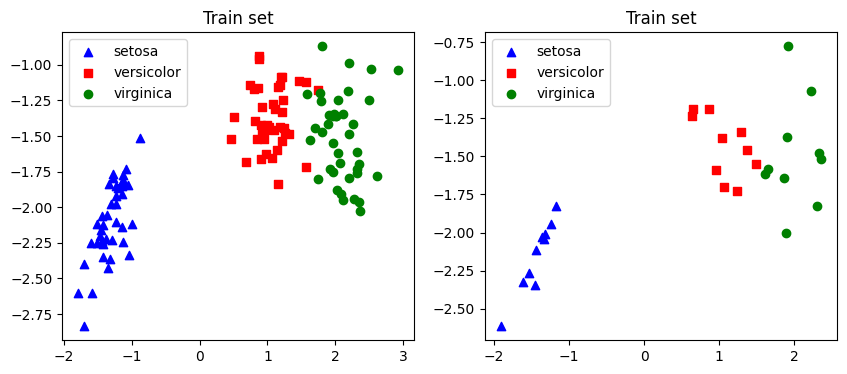

In [149]:
# visualize results
lda_train_0 = lda_train[:, y_train == 0]
lda_train_1 = lda_train[:, y_train == 1]
lda_train_2 = lda_train[:, y_train == 2]

lda_test_0 = lda_test[:, y_test == 0]
lda_test_1 = lda_test[:, y_test == 1]
lda_test_2 = lda_test[:, y_test == 2]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Tạo 2 subplot

axes[0].scatter(lda_train_0[0, :], lda_train_0[1, :], marker='^', c='b', label='setosa')
axes[0].scatter(lda_train_1[0, :], lda_train_1[1, :], marker='s', c='r', label='versicolor')
axes[0].scatter(lda_train_2[0, :], lda_train_2[1, :], marker='o', c='g', label='virginica')
axes[0].set_title('Train set')
axes[0].legend()

axes[1].scatter(lda_test_0[0, :], lda_test_0[1, :], marker='^', c='b', label='setosa')
axes[1].scatter(lda_test_1[0, :], lda_test_1[1, :], marker='s', c='r', label='versicolor')
axes[1].scatter(lda_test_2[0, :], lda_test_2[1, :], marker='o', c='g', label='virginica')
axes[1].set_title('Train set')
axes[1].legend()

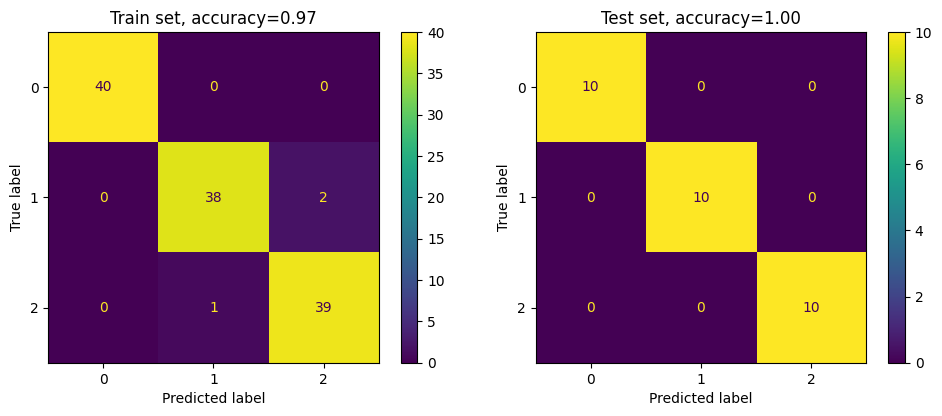

In [150]:
lr_lda = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_lda.fit(lda_train.T, y_train)

# predict
lda_train_pred = lr_lda.predict(lda_train.T)
lda_test_pred = lr_lda.predict(lda_test.T)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Tạo 2 subplot

ConfusionMatrixDisplay.from_predictions(y_train, lda_train_pred, ax=axes[0])
axes[0].set_title(f'Train set, accuracy={accuracy_score(y_train, lda_train_pred):.2f}')

ConfusionMatrixDisplay.from_predictions(y_test, lda_test_pred, ax=axes[1])
axes[1].set_title(f'Test set, accuracy={accuracy_score(y_test, lda_test_pred):.2f}')

plt.tight_layout()
plt.show()

Dữ liệu trước và sau khi thực hiện LDA khi đưa vào mô hình cho ta hiệu suất khá tương đồng. Chỉ có dữ liệu áp dụng PCA cho độ chính xác giảm nhẹ do sau khi giảm chiều, một số lớp đã có hiện tượng chồng lấn về phân phối.

## Ví dụ B2

Read data:

In [174]:
# train path 
train_images_path = 'train-images-idx3-ubyte.gz'
train_labels_path = 'train-labels-idx1-ubyte.gz'
# test path 
test_images_path = 't10k-images-idx3-ubyte.gz'
test_labels_path = 't10k-labels-idx1-ubyte.gz'

def get_mnist_data(images_path, labels_path, num_images 
                   , shuffle=False, _is=True, image_size=28): 
    """ 
        This shuffle param is active when .gz is downloaded at: 
            - 'http://yann.lecun.com/exdb/mnist/' 
            - This function return random num_images in 60000 or 10000   
    """ 
    # read data 
    import gzip           # to decompress gz (zip) file 
 
    # open file training to read training data 
    f_images = gzip.open(images_path,'r') 
     
    # skip 16 first bytes because these are not data, only header infor 
    f_images.read(16) 
     
    # general: read num_images data samples if this parameter is set; 
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000) 
 
    # read all data to buf_images (28x28xreal_num) 
    buf_images = f_images.read(image_size * image_size * real_num) 
     
    # images 
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32) 
    images = images.reshape(real_num, image_size, image_size,) 
     
    # Read labels    
    f_labels = gzip.open(labels_path,'r') 
    f_labels.read(8) 
     
    labels = np.zeros((real_num)).astype(np.int64) 
     
    # rearrange to correspond the images and labels 
    for i in range(0, real_num):    
        buf_labels = f_labels.read(1) 
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64) 
     
    # shuffle to get random images data 
    if shuffle is True: 
        rand_id = np.random.randint(real_num, size=num_images) 
         
        images = images[rand_id, :] 
        labels = labels[rand_id,] 
     
    # change images data to type of vector 28x28 dimentional 
    images = images.reshape(num_images, image_size * image_size) 
    return images, labels

images, labels = get_mnist_data( 
    train_images_path, train_labels_path, 5000, shuffle=True) 
  
print(images.shape, labels.shape)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16628\77315703.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)


#### 1.

In [198]:
mean = images.mean(axis=0)

# nomarlize
X_centered = images - mean # just center, dont need to scale 'cause every pixel is in [0, 255]

# find eigenvalues
N = images.shape[0]
X_cov = 1 / N * X_centered.T @ X_centered
u, s, v = np.linalg.svd(X_cov)

# transform
dim = 100
pca_images = u[:, :dim].T.dot(images.T)
print(f'Explained variance: {np.sum(s[:dim])/np.sum(s)*100}%')

Explained variance: 91.7906105518341%


Visualize:

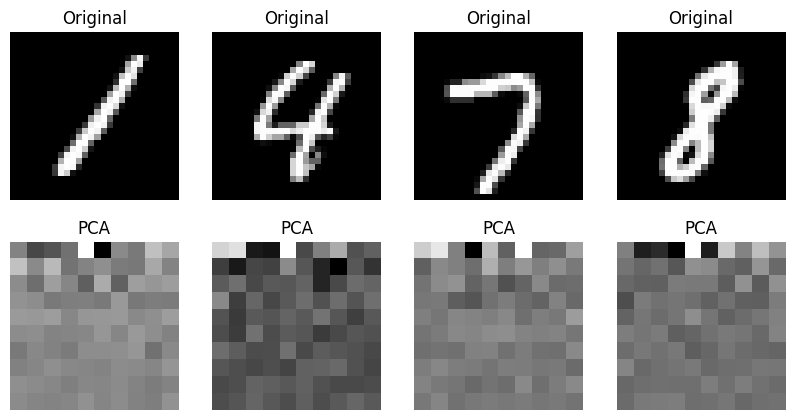

In [199]:
# take 4 random images
indices = np.random.choice(5000, 4, replace=False)

fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for i, idx in enumerate(indices):
    # Ảnh gốc
    axes[0, i].imshow(images[idx].reshape(28, 28), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis("off")
    
    # Ảnh sau khi giảm chiều và phục hồi
    axes[1, i].imshow(pca_images.T[idx].reshape(10, 10), cmap='gray')
    axes[1, i].set_title("PCA")
    axes[1, i].axis("off")

plt.show()


#### 2.

Train test split:

In [189]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=0.7, random_state=42, stratify=labels)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 784), (1500, 784), (3500,), (1500,))

##### a. Original data

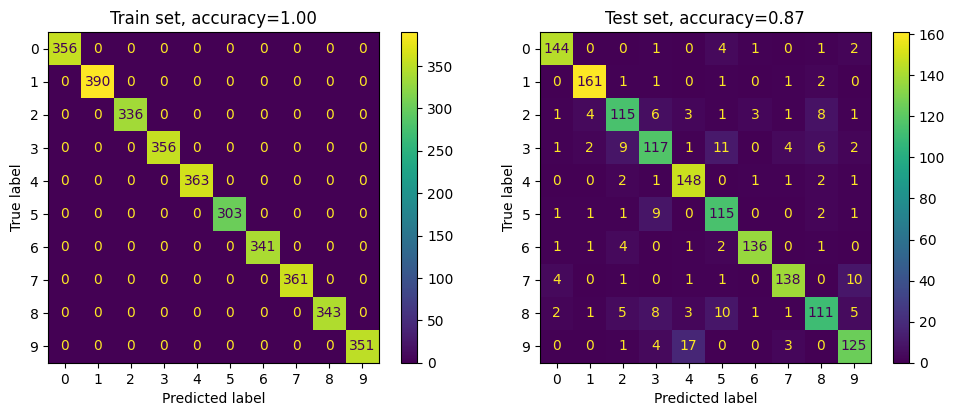

In [203]:
lr_org = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_org.fit(X_train, y_train)

# predict
lr_pred_train = lr_org.predict(X_train)
lr_pred_test = lr_org.predict(X_test)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Tạo 2 subplot

ConfusionMatrixDisplay.from_predictions(y_train, lr_pred_train, ax=axes[0])
axes[0].set_title(f'Train set, accuracy={accuracy_score(y_train, lr_pred_train):.2f}')

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred_test, ax=axes[1])
axes[1].set_title(f'Test set, accuracy={accuracy_score(y_test, lr_pred_test):.2f}')

plt.tight_layout()
plt.show()

##### b. Dimensional reductioned data

PCA:

In [191]:
mean = X_train.mean(axis=0)

# nomarlize
X_train_centered = X_train - mean # just center, dont need to scale 'cause every pixel is in [0, 255]
X_test_centered = X_test - mean

# find eigenvalues
N = X_train.shape[0]
X_cov = 1 / N * X_train_centered.T @ X_train_centered
u, s, v = np.linalg.svd(X_cov)

# transform
dim = 100
pca_train = u[:, :dim].T.dot(X_train.T)
pca_test = u[:, :dim].T.dot(X_test.T)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


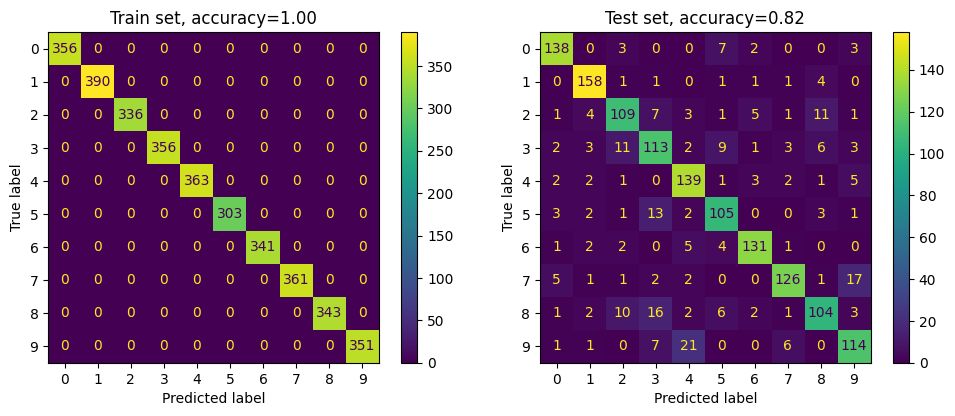

In [194]:
lr_pca = LogisticRegression(fit_intercept=True, max_iter=30000)
lr_pca.fit(pca_train.T, y_train)

# predict
lr_pred_train = lr_pca.predict(pca_train.T)
lr_pred_test = lr_pca.predict(pca_test.T)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Tạo 2 subplot

ConfusionMatrixDisplay.from_predictions(y_train, lr_pred_train, ax=axes[0])
axes[0].set_title(f'Train set, accuracy={accuracy_score(y_train, lr_pred_train):.2f}')

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred_test, ax=axes[1])
axes[1].set_title(f'Test set, accuracy={accuracy_score(y_test, lr_pred_test):.2f}')

plt.tight_layout()
plt.show()

LDA:

In [200]:
lda = LinearDiscriminantAnalysis(n_components=8)
lda_train = lda.fit_transform(X_train, y_train)
lda_test = lda.transform(X_test)

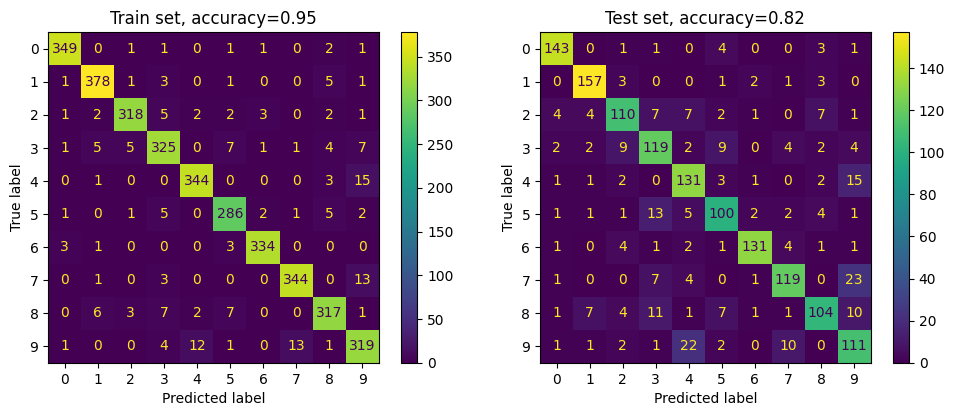

In [205]:
lr_lda = LogisticRegression(fit_intercept=True, max_iter=30000)
lr_lda.fit(lda_train, y_train)

# predict
lr_pred_train = lr_lda.predict(lda_train)
lr_pred_test = lr_lda.predict(lda_test)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Tạo 2 subplot

ConfusionMatrixDisplay.from_predictions(y_train, lr_pred_train, ax=axes[0])
axes[0].set_title(f'Train set, accuracy={accuracy_score(y_train, lr_pred_train):.2f}')

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred_test, ax=axes[1])
axes[1].set_title(f'Test set, accuracy={accuracy_score(y_test, lr_pred_test):.2f}')

plt.tight_layout()
plt.show()

Hai cách đều cho kết quả tương đương nhau.

## Ví dụ B4

In [262]:
import numpy as np  
import itertools
import matplotlib.pyplot as plt 
 
# path to the database - change it if needed 
path = r'yalefaces\\data\\'  
 
ids = range(1, 16) # 15 people 
states = ['centerlight', 'glasses', 'happy', 'leftlight',  
          'noglasses', 'normal', 'rightlight','sad',  
          'sleepy', 'surprised', 'wink' ] 
prefix = 'subject' 
 
# open one picture to get the image's size 
im = plt.imread(r'yalefaces\\data\\subject01.centerlight') 
 
h = im.shape[0] # height  
w = im.shape[1] # width 
 
D = h * w 
N = len(states)*15  
 
X = np.zeros((D, N)) 
y = np.zeros(N, dtype=np.int8)
 
# there are 15 people 
person_ids = range(1, 16)
for idx, (person_id, state) in enumerate(itertools.product(person_ids, states)):
    # get name of each image file 
    fn = path + prefix + str(person_id).zfill(2) + '.' + state
    # open the file and read as grey image 
    tmp = plt.imread(fn) 
    # then add image to dataset X 
    X[:, idx] = tmp.flatten()
    y[idx] = states.index(state)
X = X.T
X.shape, y.shape

((165, 77760), (165,))

#### a.

In [265]:
pca = PCA(n_components=135)
X_pca = pca.fit_transform(X)

#### b.

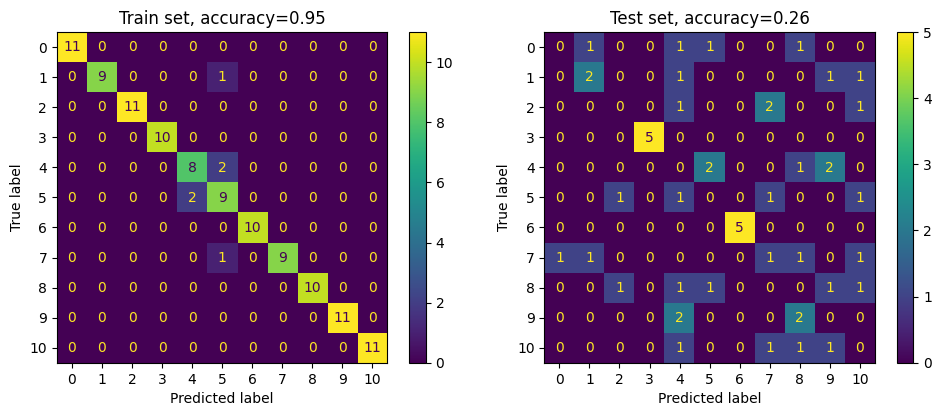

In [268]:
pca_train, pca_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.7, random_state=42, stratify=y)

lr = LogisticRegression(fit_intercept=True, max_iter=30000)
lr.fit(pca_train, y_train)

# predict
lr_pred_train = lr.predict(pca_train)
lr_pred_test = lr.predict(pca_test)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Tạo 2 subplot

ConfusionMatrixDisplay.from_predictions(y_train, lr_pred_train, ax=axes[0])
axes[0].set_title(f'Train set, accuracy={accuracy_score(y_train, lr_pred_train):.2f}')

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred_test, ax=axes[1])
axes[1].set_title(f'Test set, accuracy={accuracy_score(y_test, lr_pred_test):.2f}')

plt.tight_layout()
plt.show()

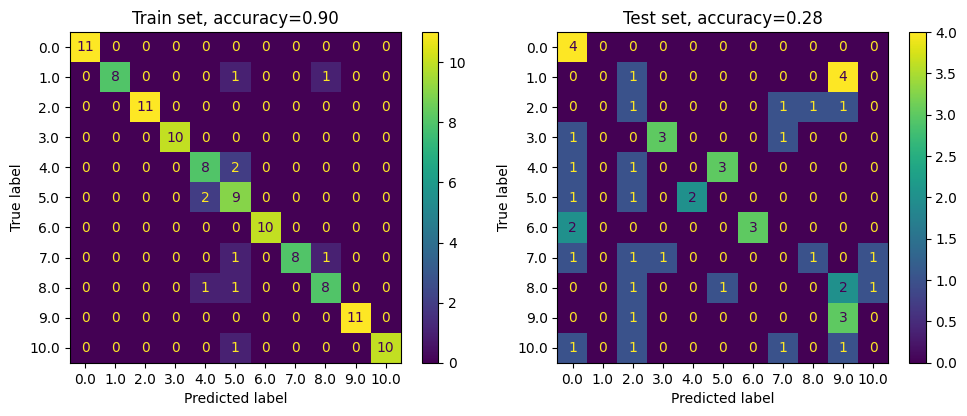

In [251]:
pca_train, pca_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.7, random_state=42, stratify=y)

gnb = GaussianNB(priors=None)
gnb.fit(pca_train, y_train)

# predict
lr_pred_train = gnb.predict(pca_train)
lr_pred_test = gnb.predict(pca_test)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Tạo 2 subplot

ConfusionMatrixDisplay.from_predictions(y_train, lr_pred_train, ax=axes[0])
axes[0].set_title(f'Train set, accuracy={accuracy_score(y_train, lr_pred_train):.2f}')

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred_test, ax=axes[1])
axes[1].set_title(f'Test set, accuracy={accuracy_score(y_test, lr_pred_test):.2f}')

plt.tight_layout()
plt.show()